In [35]:
import sys

sys.path.append("../")
from src.qaoa_scheduling import QAOACircuit, QAOAScheduler

import numpy as np
import matplotlib.pyplot as plt
from src.visualization import visualize_cyclic_graph, visualize_complete_graph

## C5 Example

In [36]:
def example_c5_circuit() -> QAOACircuit:
    """Create example QAOA circuit on 5 qubits."""
    n_qubits = 5
    gamma_gates = {
        (0, 1): 5.0,  # γ1
        (1, 2): 4.0,  # γ2
        (2, 3): 3.0,  # γ3
        (3, 4): 2.0,  # γ4
        (4, 0): 1.0,  # γ5
    }
    beta_time = 1.0

    return QAOACircuit(n_qubits=n_qubits, gamma_gates=gamma_gates, beta_time=beta_time)

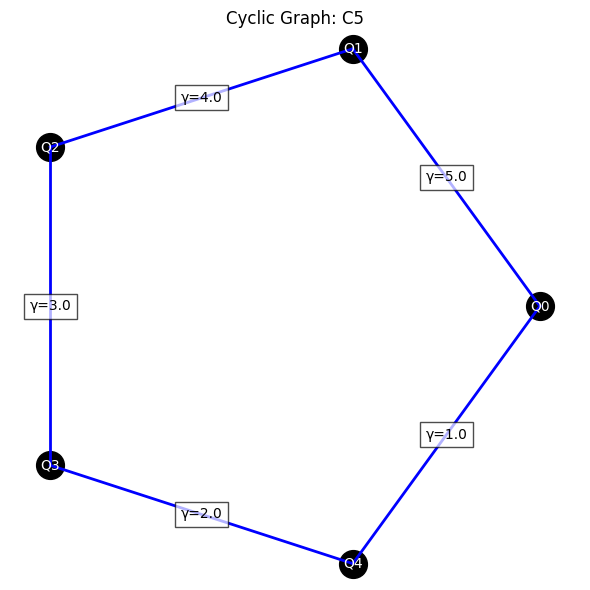

QAOA Circuit with 5 qubits

Gate times:
t_(0, 1) = 5.0
t_(1, 2) = 4.0
t_(2, 3) = 3.0
t_(3, 4) = 2.0
t_(4, 0) = 1.0
t_β = 1.0

Minimize: Z

Subject to:

1. Non-overlapping gates:
x_(0, 1) ≥ x_(1, 2) + 4.0 - M⋅y_(0, 1)(1, 2)
x_(0, 1) ≥ x_(4, 0) + 1.0 - M⋅y_(0, 1)(4, 0)
x_(1, 2) ≥ x_(2, 3) + 3.0 - M⋅y_(1, 2)(2, 3)
x_(2, 3) ≥ x_(3, 4) + 2.0 - M⋅y_(2, 3)(3, 4)
x_(3, 4) ≥ x_(4, 0) + 1.0 - M⋅y_(3, 4)(4, 0)
x_(1, 2) ≥ x_(0, 1) + 5.0 - M⋅(1-y_(0, 1)(1, 2))
x_(4, 0) ≥ x_(0, 1) + 5.0 - M⋅(1-y_(0, 1)(4, 0))
x_(2, 3) ≥ x_(1, 2) + 4.0 - M⋅(1-y_(1, 2)(2, 3))
x_(3, 4) ≥ x_(2, 3) + 3.0 - M⋅(1-y_(2, 3)(3, 4))
x_(4, 0) ≥ x_(3, 4) + 2.0 - M⋅(1-y_(3, 4)(4, 0))

2. Total time:
Z ≥ x_(0, 1) + 5.0 + 1.0
Z ≥ x_(1, 2) + 4.0 + 1.0
Z ≥ x_(2, 3) + 3.0 + 1.0
Z ≥ x_(3, 4) + 2.0 + 1.0
Z ≥ x_(4, 0) + 1.0 + 1.0

3. Variable domains:
x_g ≥ 0 for all gates g
y_gg' ∈ {0,1} for all conflicting gates g,g'
Z ≥ 0

where M = 15.0


In [37]:
# Create circuit
circuit = example_c5_circuit()
visualize_cyclic_graph(circuit)

# Create scheduler
scheduler = QAOAScheduler(circuit)

# Print LP model
print(scheduler.get_lp_model())

# Get schedule
result = scheduler.solve_lp()

In [38]:
# Print results
print("\nQAOA Gate Schedule:")
print(f"Total time before scheduling: {result.total_time_before}")
print(f"Total time after scheduling: {result.total_time_after}")
print(f"Time improvement: {result.improvement}")


QAOA Gate Schedule:
Total time before scheduling: 16.0
Total time after scheduling: 10.0
Time improvement: 6.0



Mixer layer (time = 1.0):
  All qubits in parallel


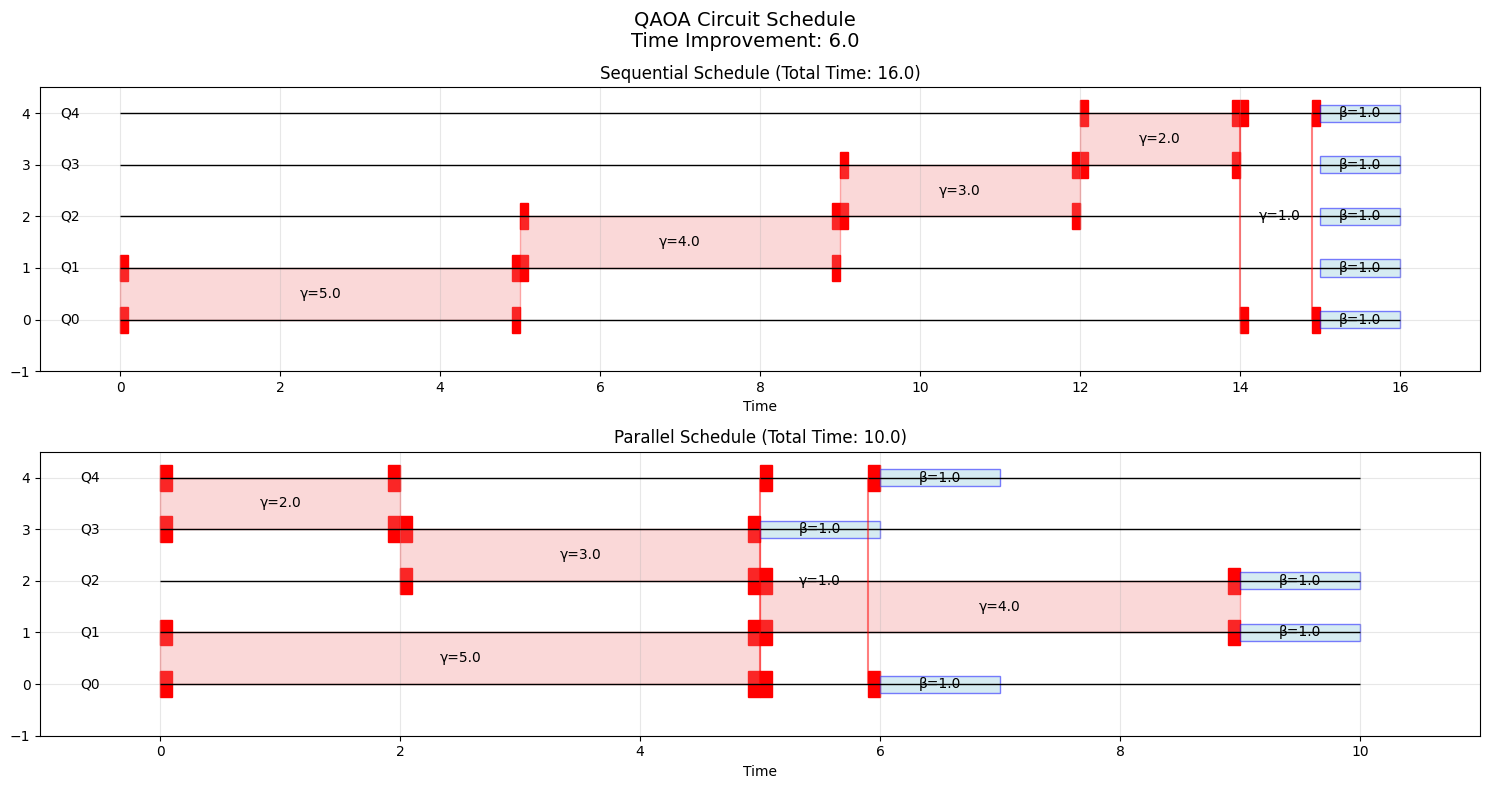

In [39]:
print(f"\nMixer layer (time = {result.mixer_layer.time}):")
print("  All qubits in parallel")

# Visualize schedule
scheduler.visualize_schedule_comparison(result)

## C7 Example

In [40]:
## C7 Example
def example_c7_circuit() -> QAOACircuit:
    """Create example QAOA circuit on 7 qubits."""
    n_qubits = 7
    gamma_gates = {
        (0, 1): 7.0,  # γ1
        (1, 2): 6.0,  # γ2
        (2, 3): 5.0,  # γ3
        (3, 4): 4.0,  # γ4
        (4, 5): 3.0,  # γ5
        (5, 6): 2.0,  # γ6
        (6, 0): 1.0,  # γ7
    }
    beta_time = 1.0

    return QAOACircuit(n_qubits=n_qubits, gamma_gates=gamma_gates, beta_time=beta_time)

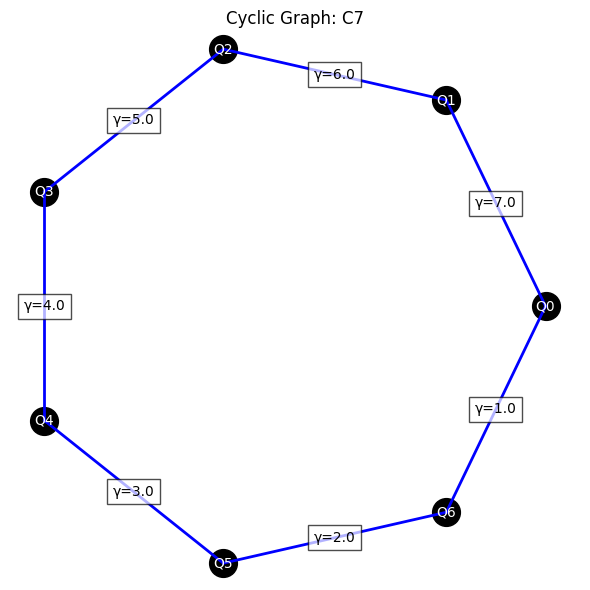


Linear Programming Model:
QAOA Circuit with 7 qubits

Gate times:
t_(0, 1) = 7.0
t_(1, 2) = 6.0
t_(2, 3) = 5.0
t_(3, 4) = 4.0
t_(4, 5) = 3.0
t_(5, 6) = 2.0
t_(6, 0) = 1.0
t_β = 1.0

Minimize: Z

Subject to:

1. Non-overlapping gates:
x_(0, 1) ≥ x_(1, 2) + 6.0 - M⋅y_(0, 1)(1, 2)
x_(0, 1) ≥ x_(6, 0) + 1.0 - M⋅y_(0, 1)(6, 0)
x_(1, 2) ≥ x_(2, 3) + 5.0 - M⋅y_(1, 2)(2, 3)
x_(2, 3) ≥ x_(3, 4) + 4.0 - M⋅y_(2, 3)(3, 4)
x_(3, 4) ≥ x_(4, 5) + 3.0 - M⋅y_(3, 4)(4, 5)
x_(4, 5) ≥ x_(5, 6) + 2.0 - M⋅y_(4, 5)(5, 6)
x_(5, 6) ≥ x_(6, 0) + 1.0 - M⋅y_(5, 6)(6, 0)
x_(1, 2) ≥ x_(0, 1) + 7.0 - M⋅(1-y_(0, 1)(1, 2))
x_(6, 0) ≥ x_(0, 1) + 7.0 - M⋅(1-y_(0, 1)(6, 0))
x_(2, 3) ≥ x_(1, 2) + 6.0 - M⋅(1-y_(1, 2)(2, 3))
x_(3, 4) ≥ x_(2, 3) + 5.0 - M⋅(1-y_(2, 3)(3, 4))
x_(4, 5) ≥ x_(3, 4) + 4.0 - M⋅(1-y_(3, 4)(4, 5))
x_(5, 6) ≥ x_(4, 5) + 3.0 - M⋅(1-y_(4, 5)(5, 6))
x_(6, 0) ≥ x_(5, 6) + 2.0 - M⋅(1-y_(5, 6)(6, 0))

2. Total time:
Z ≥ x_(0, 1) + 7.0 + 1.0
Z ≥ x_(1, 2) + 6.0 + 1.0
Z ≥ x_(2, 3) + 5.0 + 1.0
Z ≥ x_(3, 4) + 4

In [41]:
# Create circuit
circuit = example_c7_circuit()
visualize_cyclic_graph(circuit)

# Create scheduler
scheduler = QAOAScheduler(circuit)

# Print LP model
print("\nLinear Programming Model:")
print("=" * 50)
print(scheduler.get_lp_model())

# Get schedule
result = scheduler.solve_lp()

In [42]:
# Print results
print("\nQAOA Gate Schedule:")
print("=" * 50)
print(f"Total time before scheduling: {result.total_time_before}")
print(f"Total time after scheduling: {result.total_time_after}")
print(f"Time improvement: {result.improvement}")


QAOA Gate Schedule:
Total time before scheduling: 29.0
Total time after scheduling: 14.0
Time improvement: 15.0


In [43]:
print("\nCost gate layers:")
print("-" * 30)
for i, layer in enumerate(result.cost_layers):
    print(f"\nLayer {i+1} (time = {layer.time}):")
    for gate in layer.gates:
        print(f"  Gate Q{gate[0]}-Q{gate[1]}: time = {circuit.gamma_gates[gate]}")


Cost gate layers:
------------------------------

Layer 1 (time = 6.0):
  Gate Q1-Q2: time = 6.0

Layer 2 (time = 4.0):
  Gate Q3-Q4: time = 4.0

Layer 3 (time = 1.0):
  Gate Q6-Q0: time = 1.0

Layer 4 (time = 2.0):
  Gate Q5-Q6: time = 2.0

Layer 5 (time = 3.0):
  Gate Q4-Q5: time = 3.0

Layer 6 (time = 7.0):
  Gate Q0-Q1: time = 7.0

Layer 7 (time = 5.0):
  Gate Q2-Q3: time = 5.0



Mixer layer (time = 1.0):
------------------------------
  All qubits in parallel


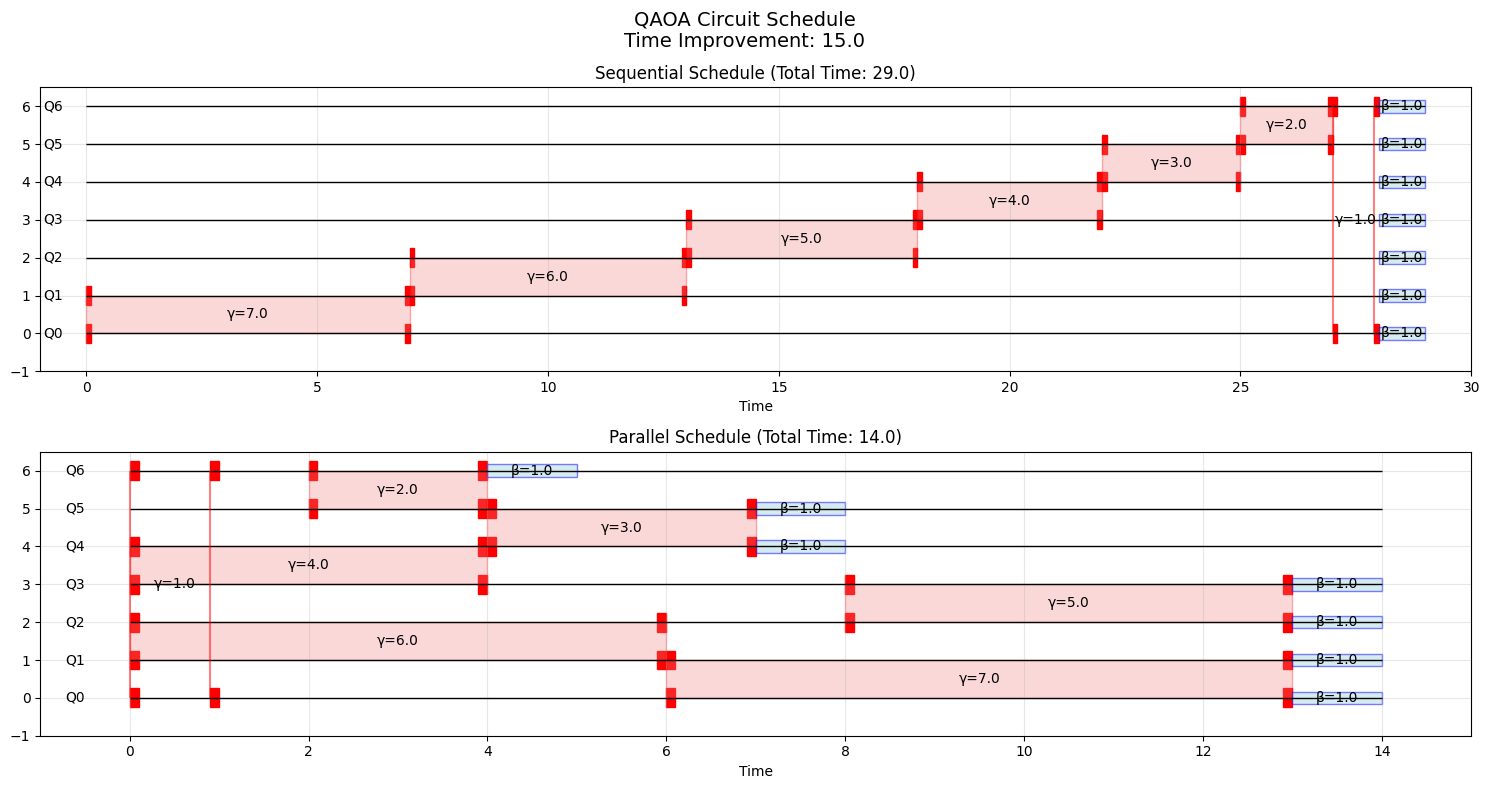

In [44]:
print(f"\nMixer layer (time = {result.mixer_layer.time}):")
print("-" * 30)
print("  All qubits in parallel")

# Visualize schedule
scheduler.visualize_schedule_comparison(result)


Graph Visualization:


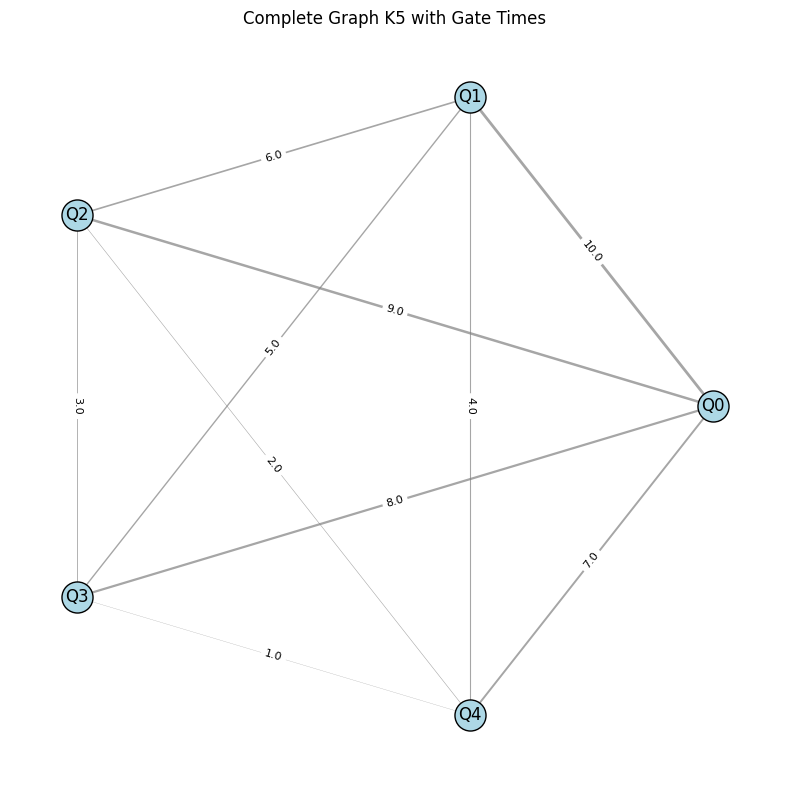


Linear Programming Model:
QAOA Circuit with 5 qubits

Gate times:
t_(0, 1) = 10.0
t_(0, 2) = 9.0
t_(0, 3) = 8.0
t_(0, 4) = 7.0
t_(1, 2) = 6.0
t_(1, 3) = 5.0
t_(1, 4) = 4.0
t_(2, 3) = 3.0
t_(2, 4) = 2.0
t_(3, 4) = 1.0
t_β = 1.0

Minimize: Z

Subject to:

1. Non-overlapping gates:
x_(0, 1) ≥ x_(0, 2) + 9.0 - M⋅y_(0, 1)(0, 2)
x_(0, 1) ≥ x_(0, 3) + 8.0 - M⋅y_(0, 1)(0, 3)
x_(0, 1) ≥ x_(0, 4) + 7.0 - M⋅y_(0, 1)(0, 4)
x_(0, 1) ≥ x_(1, 2) + 6.0 - M⋅y_(0, 1)(1, 2)
x_(0, 1) ≥ x_(1, 3) + 5.0 - M⋅y_(0, 1)(1, 3)
x_(0, 1) ≥ x_(1, 4) + 4.0 - M⋅y_(0, 1)(1, 4)
x_(0, 2) ≥ x_(0, 3) + 8.0 - M⋅y_(0, 2)(0, 3)
x_(0, 2) ≥ x_(0, 4) + 7.0 - M⋅y_(0, 2)(0, 4)
x_(0, 2) ≥ x_(1, 2) + 6.0 - M⋅y_(0, 2)(1, 2)
x_(0, 2) ≥ x_(2, 3) + 3.0 - M⋅y_(0, 2)(2, 3)
x_(0, 2) ≥ x_(2, 4) + 2.0 - M⋅y_(0, 2)(2, 4)
x_(0, 3) ≥ x_(0, 4) + 7.0 - M⋅y_(0, 3)(0, 4)
x_(0, 3) ≥ x_(1, 3) + 5.0 - M⋅y_(0, 3)(1, 3)
x_(0, 3) ≥ x_(2, 3) + 3.0 - M⋅y_(0, 3)(2, 3)
x_(0, 3) ≥ x_(3, 4) + 1.0 - M⋅y_(0, 3)(3, 4)
x_(0, 4) ≥ x_(1, 4) + 4.0 - M⋅y_(0, 4)(1, 4)

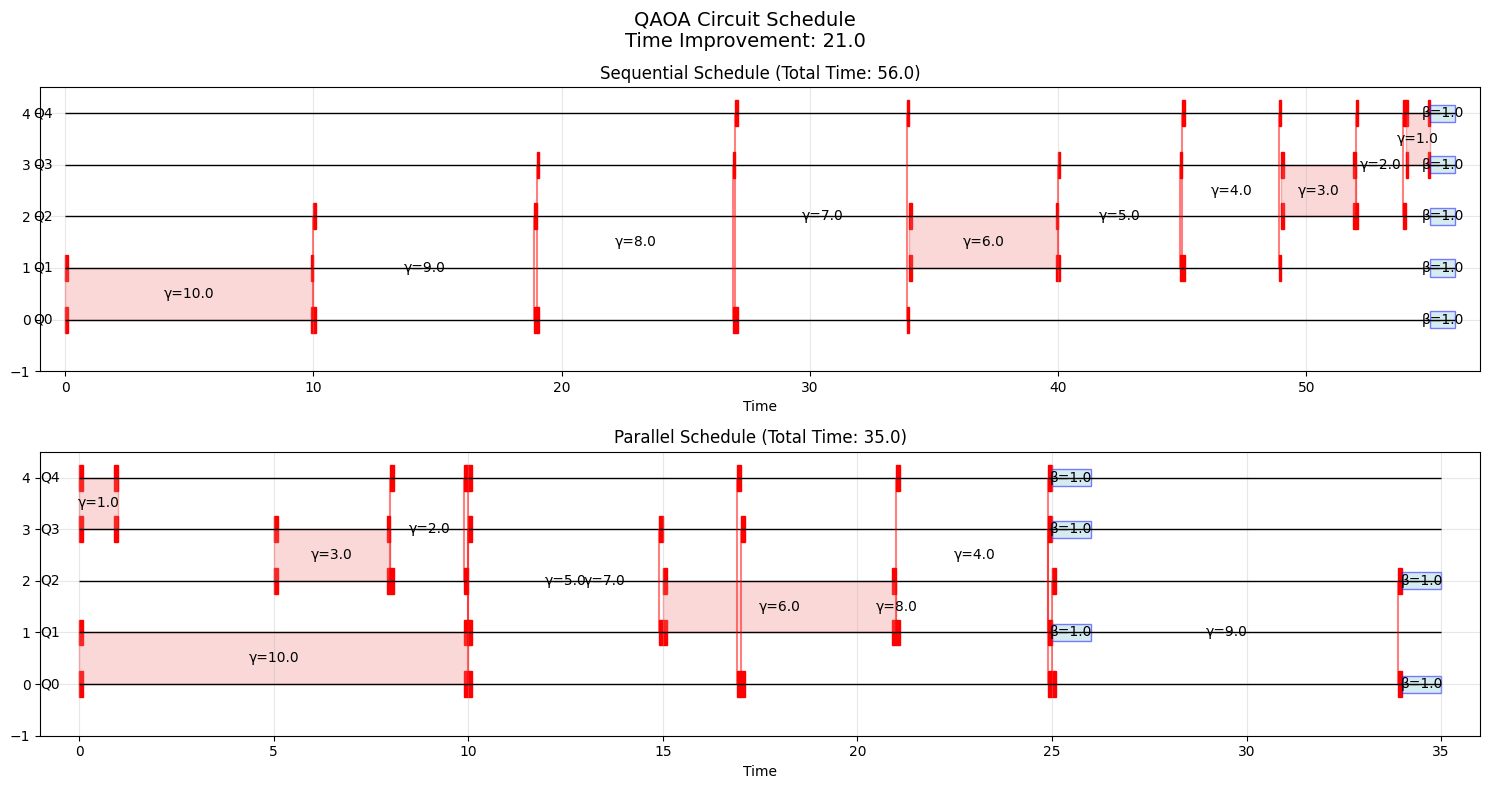

In [ ]:
# ## K4 Example (Complete Graph)
# def example_k4_circuit() -> QAOACircuit:
#     """Create example QAOA circuit on 4 qubits with complete graph connectivity."""
#     n_qubits = 4
#     gamma_gates = {
#         # Connections from vertex 0
#         (0, 1): 6.0,
#         (0, 2): 5.0,
#         (0, 3): 4.0,
#         # Connections from vertex 1
#         (1, 2): 3.0,
#         (1, 3): 2.0,
#         # Connection from vertex 2
#         (2, 3): 1.0
#     }
#     beta_time = 1.0

#     return QAOACircuit(n_qubits=n_qubits, gamma_gates=gamma_gates, beta_time=beta_time)

# # Create circuit
# circuit = example_k4_circuit()


## K5 Example (Complete Graph)
def example_k5_circuit() -> QAOACircuit:
    """Create example QAOA circuit on 5 qubits with complete graph connectivity."""
    n_qubits = 5
    gamma_gates = {
        # Connections from vertex 0
        (0, 1): 10.0,
        (0, 2): 9.0,
        (0, 3): 8.0,
        (0, 4): 7.0,
        # Connections from vertex 1
        (1, 2): 6.0,
        (1, 3): 5.0,
        (1, 4): 4.0,
        # Connections from vertex 2
        (2, 3): 3.0,
        (2, 4): 2.0,
        # Connection from vertex 3
        (3, 4): 1.0,
    }
    beta_time = 1.0

    return QAOACircuit(n_qubits=n_qubits, gamma_gates=gamma_gates, beta_time=beta_time)


# Create circuit
circuit = example_k5_circuit()

# Visualize the graph
print("\nGraph Visualization:")
print("=" * 50)
visualize_complete_graph(circuit)
plt.show()

# Create scheduler
scheduler = QAOAScheduler(circuit)

# Print LP model
print("\nLinear Programming Model:")
print("=" * 50)
print(scheduler.get_lp_model())

# Get schedule
result = scheduler.solve_lp()
# result = scheduler.schedule_greedy()

# Print results
print("\nQAOA Gate Schedule:")
print("=" * 50)
print(f"Total time before scheduling: {result.total_time_before}")
print(f"Total time after scheduling: {result.total_time_after}")
print(f"Time improvement: {result.improvement}")
print("\nCost gate layers:")
print("-" * 30)
for i, layer in enumerate(result.cost_layers):
    print(f"\nLayer {i+1} (time = {layer.time}):")
    for gate in layer.gates:
        print(f"  Gate Q{gate[0]}-Q{gate[1]}: time = {circuit.gamma_gates[gate]}")
print(f"\nMixer layer (time = {result.mixer_layer.time}):")
print("-" * 30)
print("  All qubits in parallel")

# Visualize schedule
scheduler.visualize_schedule_comparison(result)

# # Run random examples
# print("\nRandom K4 Examples")
# print("=" * 50)
# n_instances = 5
# k4_results = []
# for i in range(n_instances):
#     print(f"\nInstance {i+1}")
#     print("-" * 30)
#     circuit = create_random_complete_circuit(n_qubits=4, seed=42 + i)
#     result = run_example(circuit, i + 1)
#     k4_results.append(result)

# # Analysis
# analyze_results(k4_results, "K4")

## Circuits with Random Times

In [45]:
def create_random_circuit(
    n_qubits: int,
    gamma_min: float = 0,
    gamma_max: float = 2 * np.pi,
    beta_time: float = 1.0,
    seed=None,
) -> QAOACircuit:
    if seed is not None:
        np.random.seed(seed)

    gamma_gates = {}
    for i in range(n_qubits):
        gamma_gates[(i, (i + 1) % n_qubits)] = np.round(
            np.random.uniform(gamma_min, gamma_max), 3
        )

    return QAOACircuit(n_qubits=n_qubits, gamma_gates=gamma_gates, beta_time=beta_time)


def run_example(circuit: QAOACircuit, instance_num: int):
    print(f"\nInstance {instance_num}")
    print("=" * 50)

    visualize_cyclic_graph(circuit)

    print("Gate times:")
    for gate, time in circuit.gamma_gates.items():
        print(f"  γ(Q{gate[0]}-Q{gate[1]}): {time:.2f}")

    scheduler = QAOAScheduler(circuit)
    result = scheduler.solve_lp()

    print("\nScheduling results:")
    print(f"Total time before: {result.total_time_before:.2f}")
    print(f"Total time after: {result.total_time_after:.2f}")
    print(
        f"Time improvement: {result.improvement:.2f} ({result.improvement/result.total_time_before:.1%})"
    )

    print("\nScheduling layers:")
    for i, layer in enumerate(result.cost_layers):
        print(f"\nLayer {i+1} (time = {layer.time:.2f}):")
        for gate in layer.gates:
            print(
                f"  Gate Q{gate[0]}-Q{gate[1]}: time = {circuit.gamma_gates[gate]:.2f}"
            )

    print(f"\nMixer layer (time = {result.mixer_layer.time:.2f})")
    scheduler.visualize_schedule_comparison(result)
    return result


def analyze_results(results, circuit_type: str):
    improvements = [r.improvement / r.total_time_before for r in results]
    n_layers = [len(r.cost_layers) for r in results]

    print(f"\nAnalysis for {circuit_type}:")
    print("=" * 50)
    print(f"Average improvement: {np.mean(improvements):.1%}")
    print(f"Best improvement: {max(improvements):.1%}")
    print(f"Worst improvement: {min(improvements):.1%}")
    print(f"Average number of layers: {np.mean(n_layers):.1f}")
    print(f"Layer distribution: {np.unique(n_layers, return_counts=True)}")

In [46]:
# Run random examples
n_instances = 5
base_seed = 42


C5 Examples

Instance 1


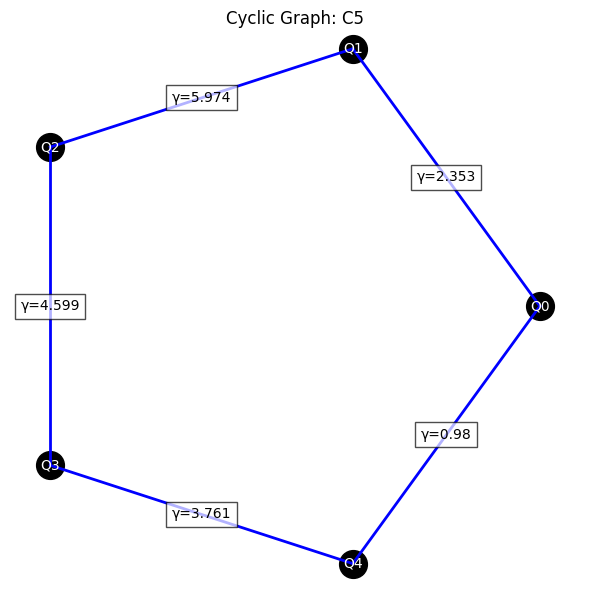

Gate times:
  γ(Q0-Q1): 2.35
  γ(Q1-Q2): 5.97
  γ(Q2-Q3): 4.60
  γ(Q3-Q4): 3.76
  γ(Q4-Q0): 0.98

Scheduling results:
Total time before: 18.67
Total time after: 11.57
Time improvement: 7.09 (38.0%)

Scheduling layers:

Layer 1 (time = 5.97):
  Gate Q1-Q2: time = 5.97

Layer 2 (time = 0.98):
  Gate Q4-Q0: time = 0.98

Layer 3 (time = 3.76):
  Gate Q3-Q4: time = 3.76

Layer 4 (time = 4.60):
  Gate Q2-Q3: time = 4.60

Layer 5 (time = 2.35):
  Gate Q0-Q1: time = 2.35

Mixer layer (time = 1.00)


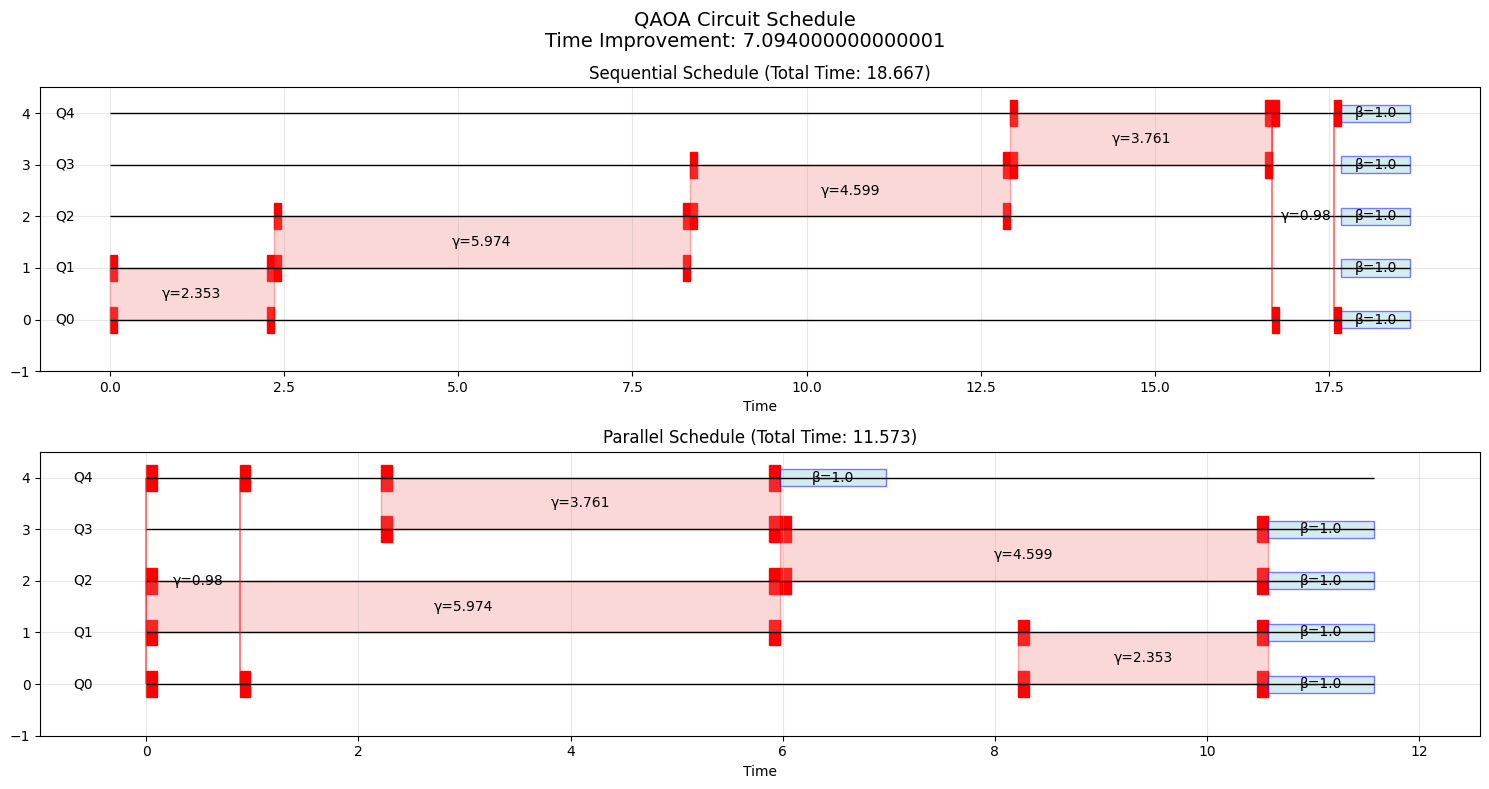


Instance 2


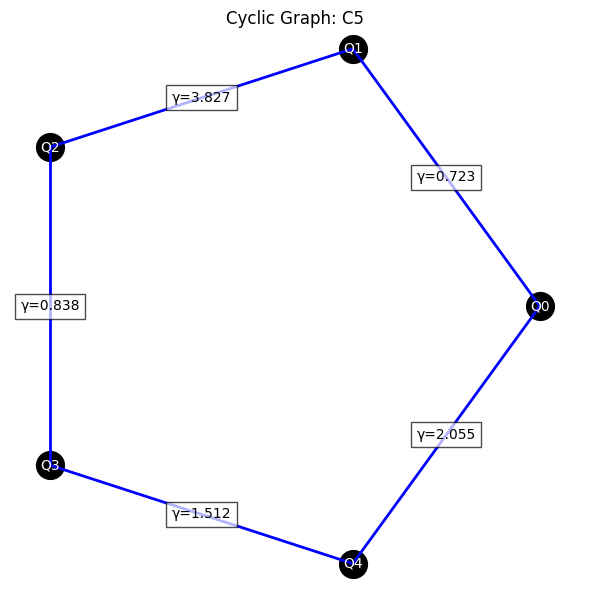

Gate times:
  γ(Q0-Q1): 0.72
  γ(Q1-Q2): 3.83
  γ(Q2-Q3): 0.84
  γ(Q3-Q4): 1.51
  γ(Q4-Q0): 2.06

Scheduling results:
Total time before: 9.96
Total time after: 5.67
Time improvement: 4.29 (43.1%)

Scheduling layers:

Layer 1 (time = 3.83):
  Gate Q1-Q2: time = 3.83

Layer 2 (time = 2.06):
  Gate Q4-Q0: time = 2.06

Layer 3 (time = 1.51):
  Gate Q3-Q4: time = 1.51

Layer 4 (time = 0.72):
  Gate Q0-Q1: time = 0.72

Layer 5 (time = 0.84):
  Gate Q2-Q3: time = 0.84

Mixer layer (time = 1.00)


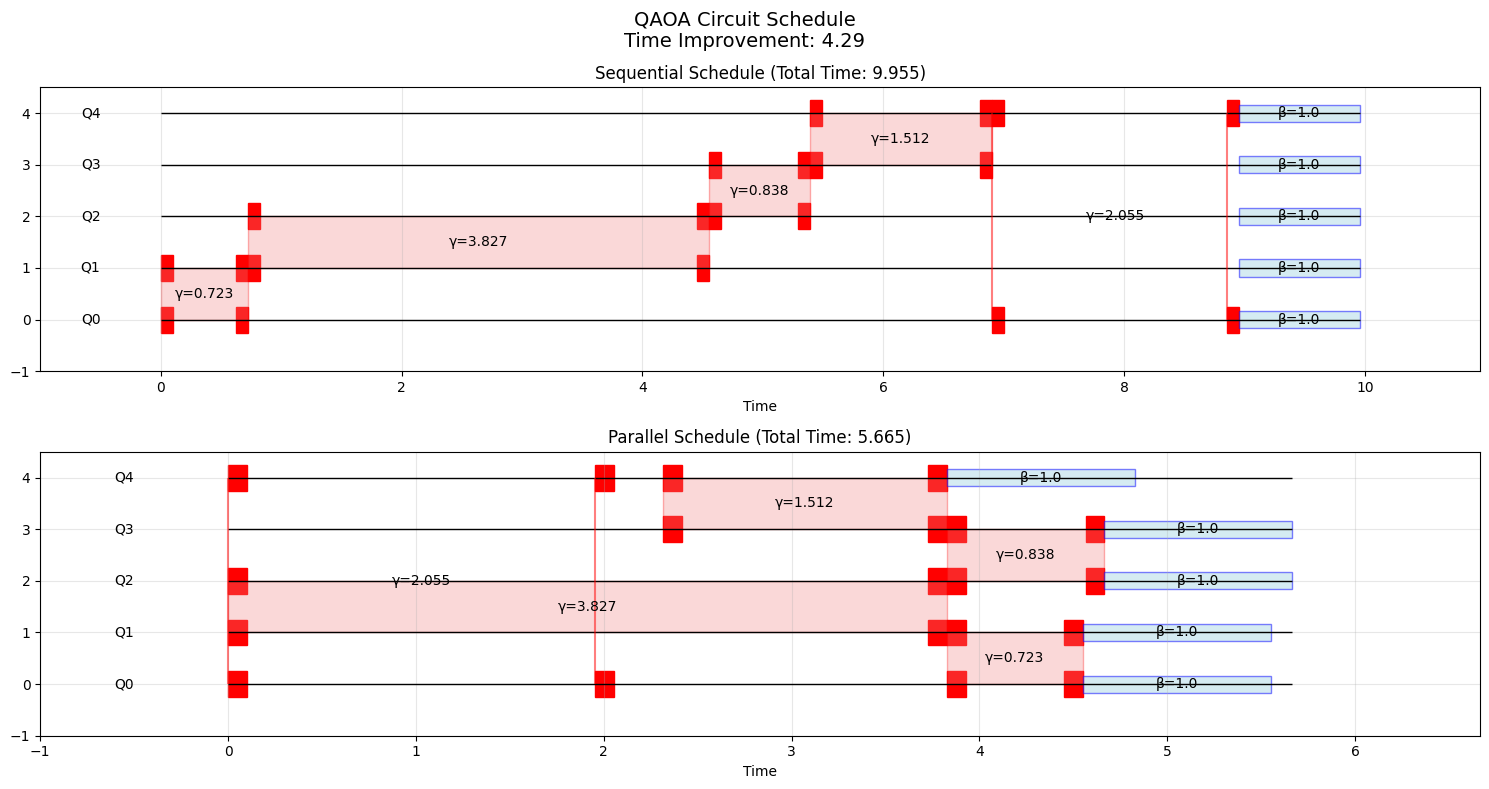


Instance 3


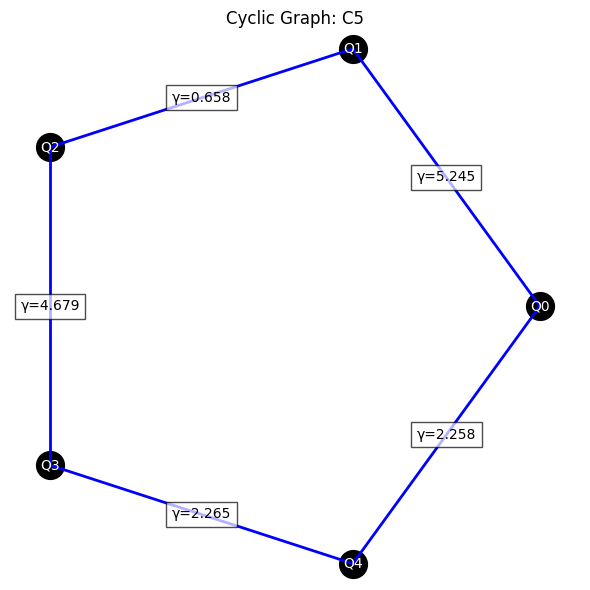

Gate times:
  γ(Q0-Q1): 5.25
  γ(Q1-Q2): 0.66
  γ(Q2-Q3): 4.68
  γ(Q3-Q4): 2.27
  γ(Q4-Q0): 2.26

Scheduling results:
Total time before: 16.11
Total time after: 8.60
Time improvement: 7.50 (46.6%)

Scheduling layers:

Layer 1 (time = 0.66):
  Gate Q1-Q2: time = 0.66

Layer 2 (time = 2.26):
  Gate Q4-Q0: time = 2.26

Layer 3 (time = 4.68):
  Gate Q2-Q3: time = 4.68

Layer 4 (time = 5.25):
  Gate Q0-Q1: time = 5.25

Layer 5 (time = 2.27):
  Gate Q3-Q4: time = 2.27

Mixer layer (time = 1.00)


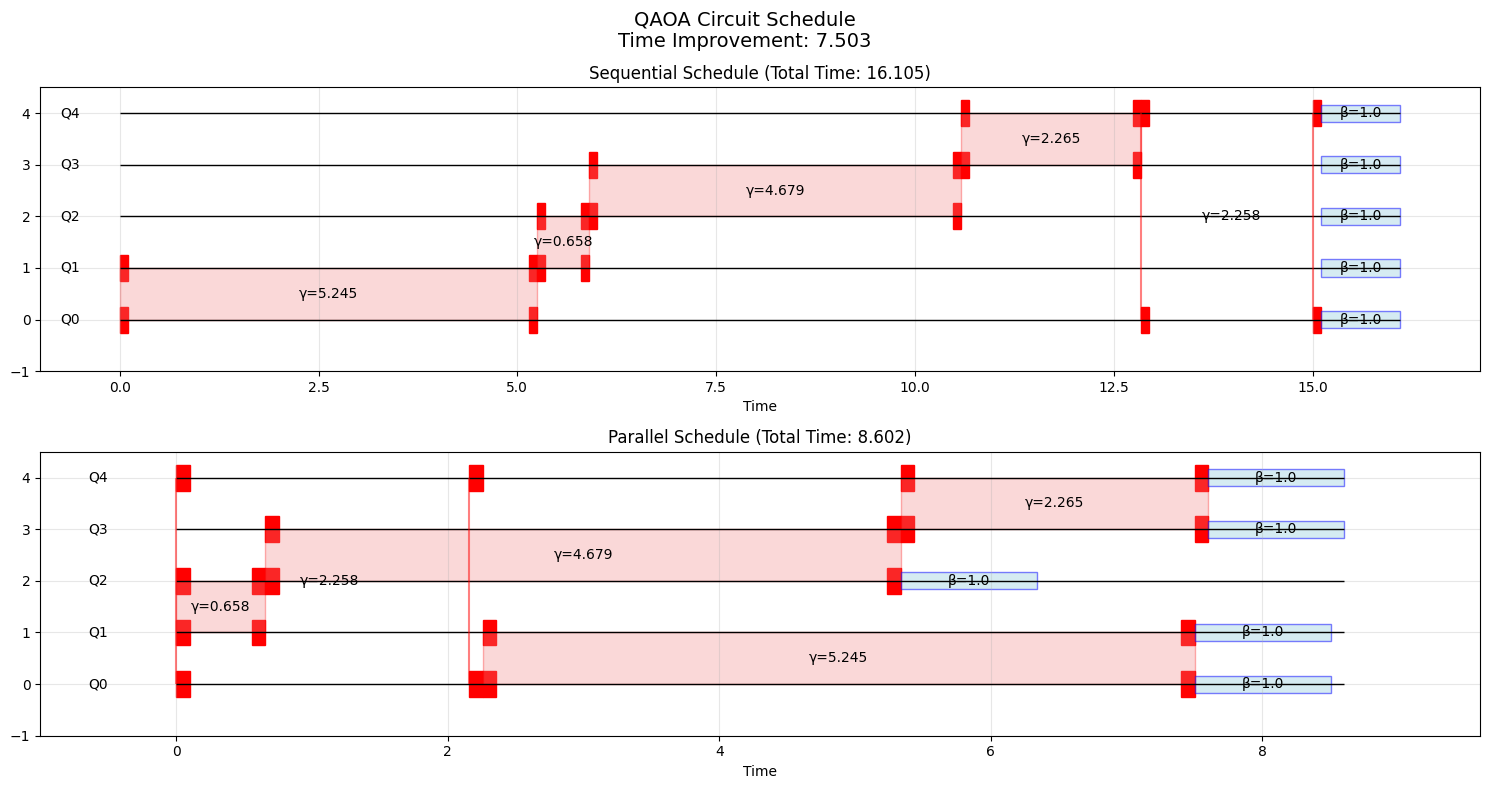


Instance 4


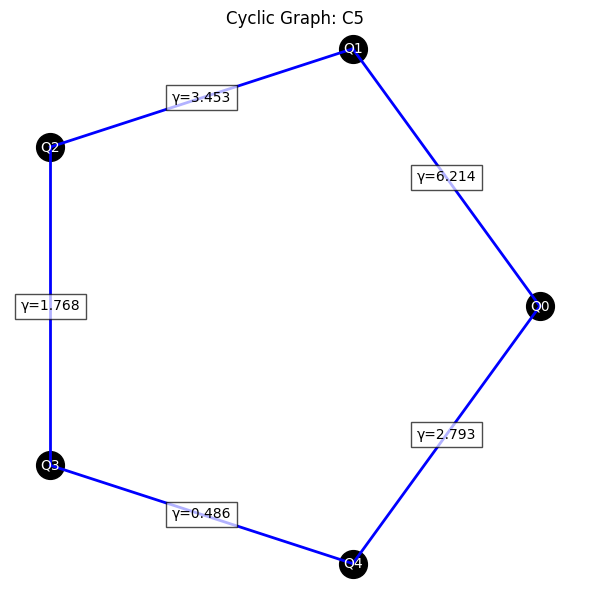

Gate times:
  γ(Q0-Q1): 6.21
  γ(Q1-Q2): 3.45
  γ(Q2-Q3): 1.77
  γ(Q3-Q4): 0.49
  γ(Q4-Q0): 2.79

Scheduling results:
Total time before: 15.71
Total time after: 10.67
Time improvement: 5.05 (32.1%)

Scheduling layers:

Layer 1 (time = 3.45):
  Gate Q1-Q2: time = 3.45

Layer 2 (time = 2.79):
  Gate Q4-Q0: time = 2.79

Layer 3 (time = 6.21):
  Gate Q0-Q1: time = 6.21

Layer 4 (time = 0.49):
  Gate Q3-Q4: time = 0.49

Layer 5 (time = 1.77):
  Gate Q2-Q3: time = 1.77

Mixer layer (time = 1.00)


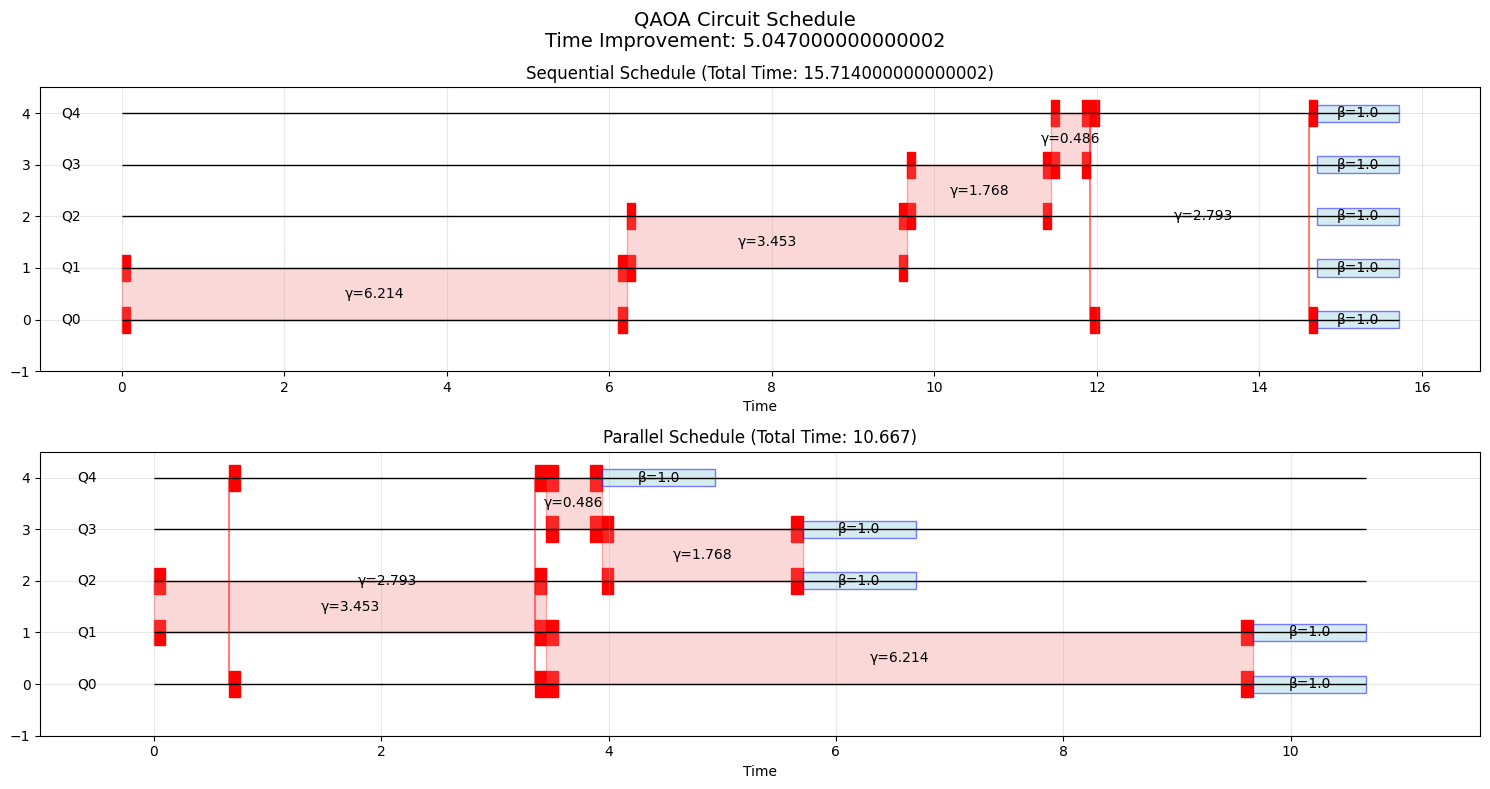


Instance 5


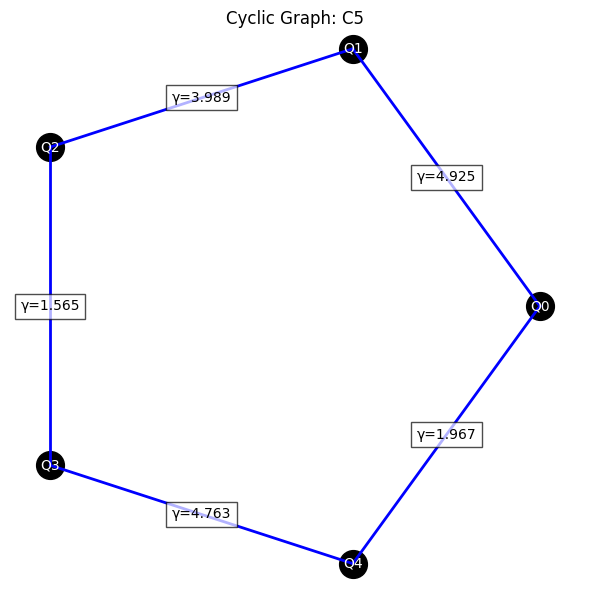

Gate times:
  γ(Q0-Q1): 4.92
  γ(Q1-Q2): 3.99
  γ(Q2-Q3): 1.56
  γ(Q3-Q4): 4.76
  γ(Q4-Q0): 1.97

Scheduling results:
Total time before: 18.21
Total time after: 9.91
Time improvement: 8.29 (45.6%)

Scheduling layers:

Layer 1 (time = 4.92):
  Gate Q0-Q1: time = 4.92

Layer 2 (time = 1.56):
  Gate Q2-Q3: time = 1.56

Layer 3 (time = 4.76):
  Gate Q3-Q4: time = 4.76

Layer 4 (time = 3.99):
  Gate Q1-Q2: time = 3.99

Layer 5 (time = 1.97):
  Gate Q4-Q0: time = 1.97

Mixer layer (time = 1.00)


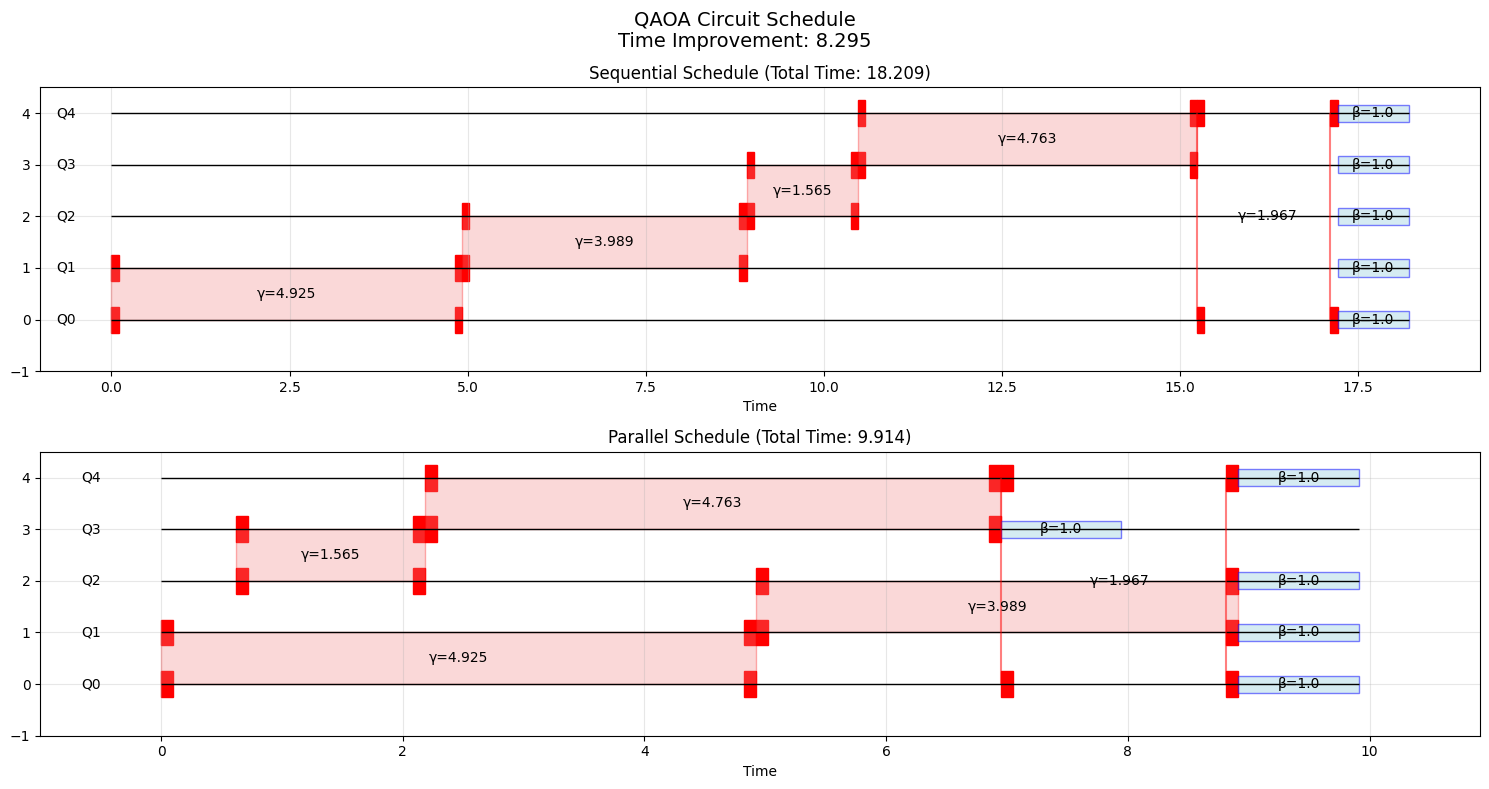

In [47]:
# C5 examples
print("\nC5 Examples")
print("=" * 50)
c5_results = []
for i in range(n_instances):
    circuit = create_random_circuit(n_qubits=5, seed=base_seed + i)
    result = run_example(circuit, i + 1)
    c5_results.append(result)


C7 Examples

Instance 1


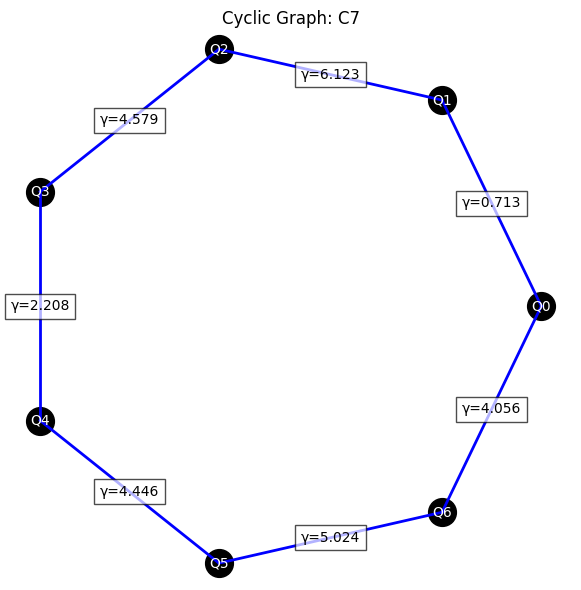

Gate times:
  γ(Q0-Q1): 0.71
  γ(Q1-Q2): 6.12
  γ(Q2-Q3): 4.58
  γ(Q3-Q4): 2.21
  γ(Q4-Q5): 4.45
  γ(Q5-Q6): 5.02
  γ(Q6-Q0): 4.06

Scheduling results:
Total time before: 28.15
Total time after: 11.70
Time improvement: 16.45 (58.4%)

Scheduling layers:

Layer 1 (time = 6.12):
  Gate Q1-Q2: time = 6.12

Layer 2 (time = 5.02):
  Gate Q5-Q6: time = 5.02

Layer 3 (time = 2.21):
  Gate Q3-Q4: time = 2.21

Layer 4 (time = 4.06):
  Gate Q6-Q0: time = 4.06

Layer 5 (time = 4.58):
  Gate Q2-Q3: time = 4.58

Layer 6 (time = 4.45):
  Gate Q4-Q5: time = 4.45

Layer 7 (time = 0.71):
  Gate Q0-Q1: time = 0.71

Mixer layer (time = 1.00)


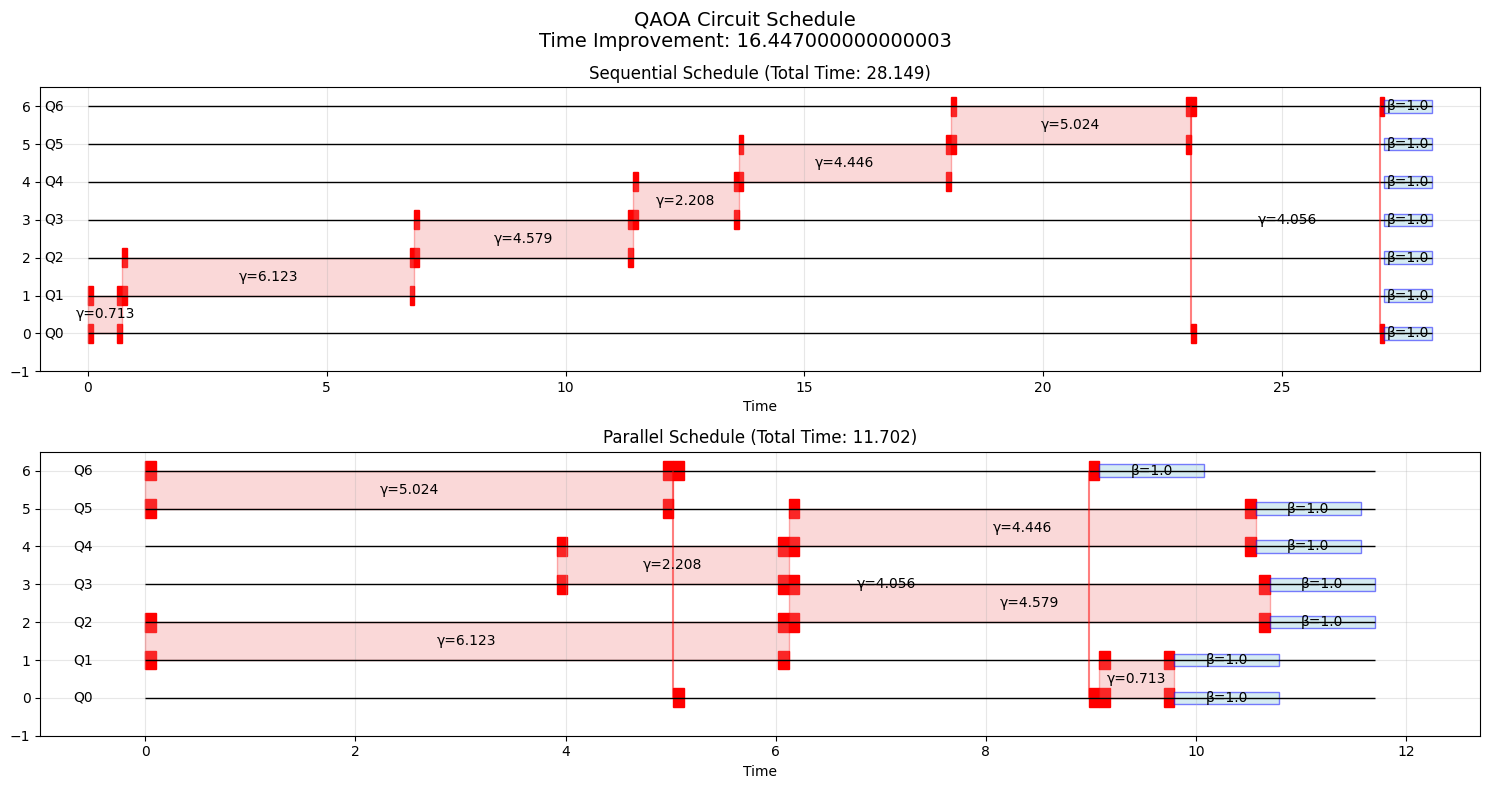


Instance 2


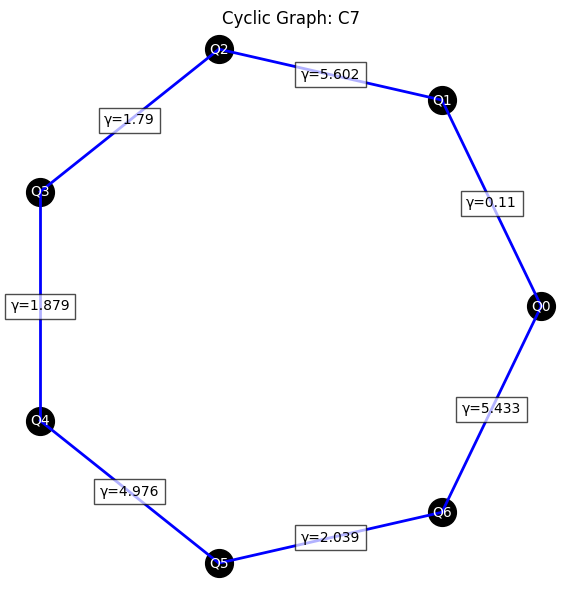

Gate times:
  γ(Q0-Q1): 0.11
  γ(Q1-Q2): 5.60
  γ(Q2-Q3): 1.79
  γ(Q3-Q4): 1.88
  γ(Q4-Q5): 4.98
  γ(Q5-Q6): 2.04
  γ(Q6-Q0): 5.43

Scheduling results:
Total time before: 22.83
Total time after: 8.50
Time improvement: 14.33 (62.8%)

Scheduling layers:

Layer 1 (time = 1.79):
  Gate Q2-Q3: time = 1.79

Layer 2 (time = 5.43):
  Gate Q6-Q0: time = 5.43

Layer 3 (time = 4.98):
  Gate Q4-Q5: time = 4.98

Layer 4 (time = 5.60):
  Gate Q1-Q2: time = 5.60

Layer 5 (time = 2.04):
  Gate Q5-Q6: time = 2.04

Layer 6 (time = 1.88):
  Gate Q3-Q4: time = 1.88

Layer 7 (time = 0.11):
  Gate Q0-Q1: time = 0.11

Mixer layer (time = 1.00)


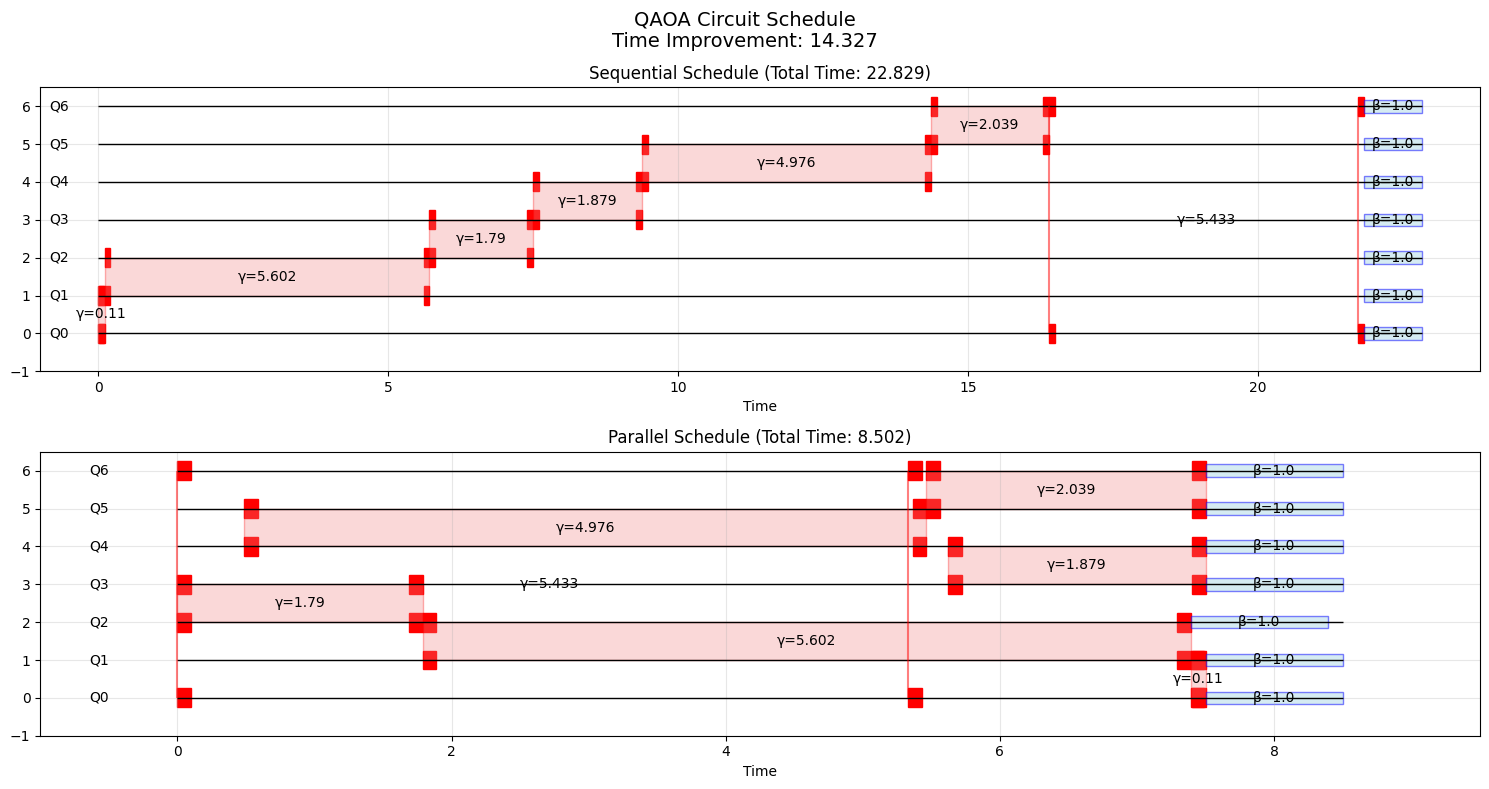


Instance 3


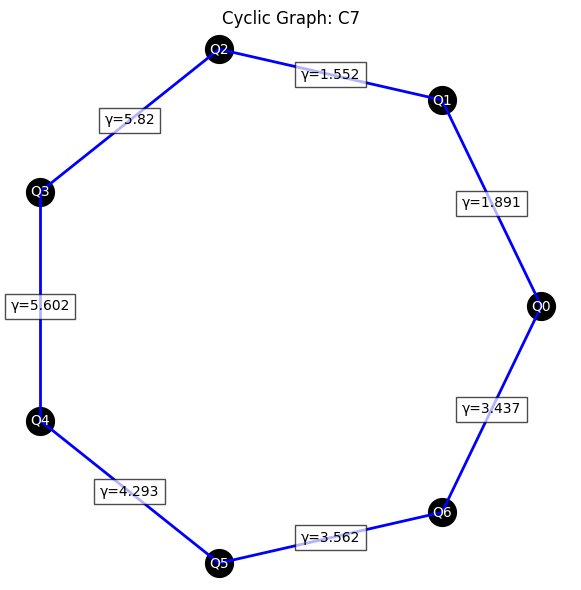

Gate times:
  γ(Q0-Q1): 1.89
  γ(Q1-Q2): 1.55
  γ(Q2-Q3): 5.82
  γ(Q3-Q4): 5.60
  γ(Q4-Q5): 4.29
  γ(Q5-Q6): 3.56
  γ(Q6-Q0): 3.44

Scheduling results:
Total time before: 27.16
Total time after: 12.42
Time improvement: 14.74 (54.3%)

Scheduling layers:

Layer 1 (time = 5.82):
  Gate Q2-Q3: time = 5.82

Layer 2 (time = 4.29):
  Gate Q4-Q5: time = 4.29

Layer 3 (time = 3.44):
  Gate Q6-Q0: time = 3.44

Layer 4 (time = 3.56):
  Gate Q5-Q6: time = 3.56

Layer 5 (time = 5.60):
  Gate Q3-Q4: time = 5.60

Layer 6 (time = 1.55):
  Gate Q1-Q2: time = 1.55

Layer 7 (time = 1.89):
  Gate Q0-Q1: time = 1.89

Mixer layer (time = 1.00)


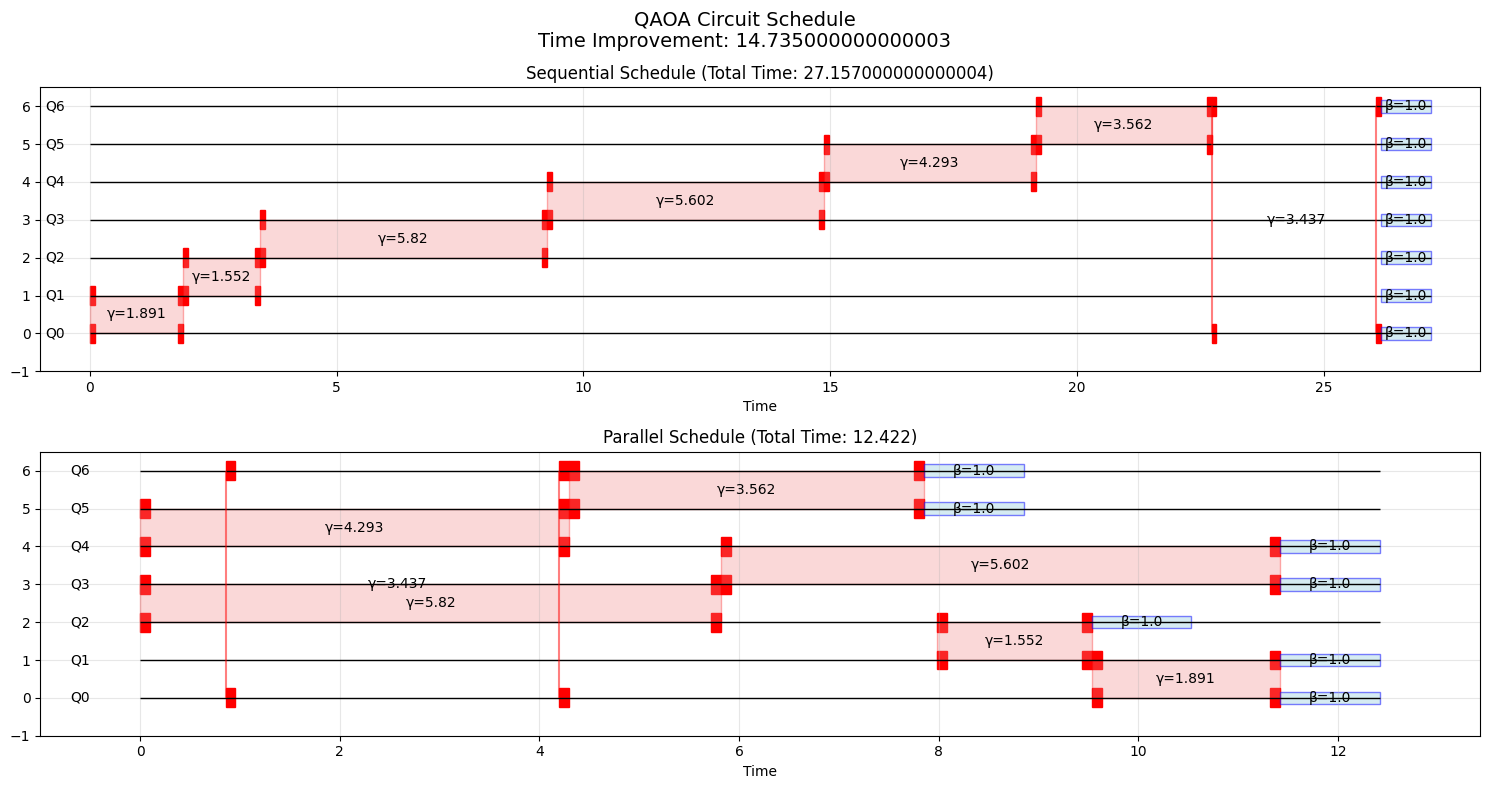


Instance 4


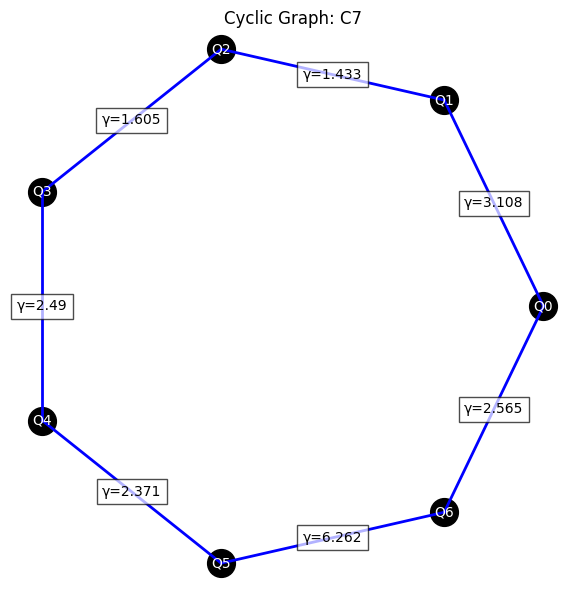

Gate times:
  γ(Q0-Q1): 3.11
  γ(Q1-Q2): 1.43
  γ(Q2-Q3): 1.60
  γ(Q3-Q4): 2.49
  γ(Q4-Q5): 2.37
  γ(Q5-Q6): 6.26
  γ(Q6-Q0): 2.56

Scheduling results:
Total time before: 20.83
Total time after: 9.83
Time improvement: 11.01 (52.8%)

Scheduling layers:

Layer 1 (time = 2.37):
  Gate Q4-Q5: time = 2.37

Layer 2 (time = 2.56):
  Gate Q6-Q0: time = 2.56

Layer 3 (time = 1.43):
  Gate Q1-Q2: time = 1.43

Layer 4 (time = 3.11):
  Gate Q0-Q1: time = 3.11

Layer 5 (time = 6.26):
  Gate Q5-Q6: time = 6.26

Layer 6 (time = 2.49):
  Gate Q3-Q4: time = 2.49

Layer 7 (time = 1.60):
  Gate Q2-Q3: time = 1.60

Mixer layer (time = 1.00)


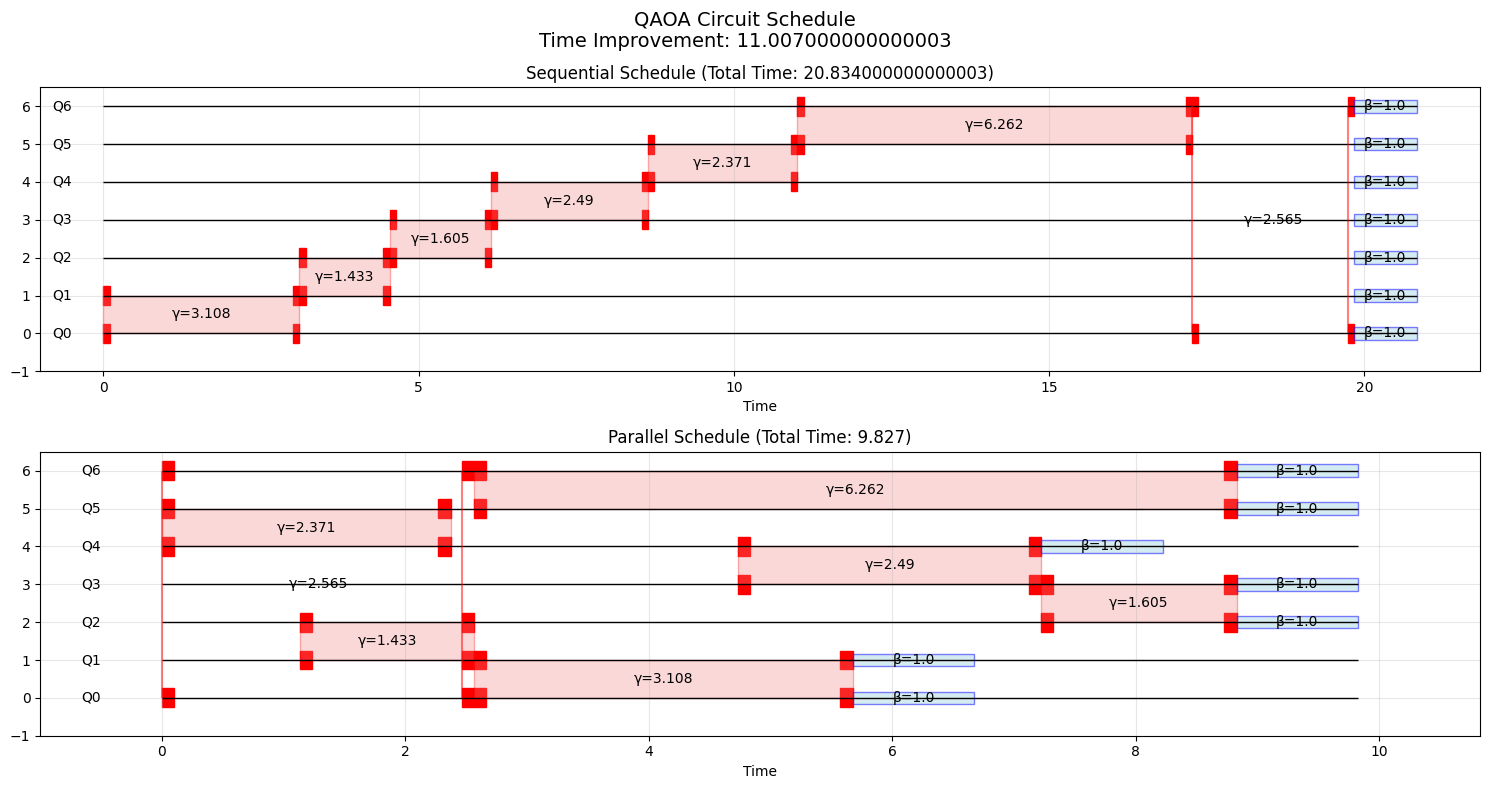


Instance 5


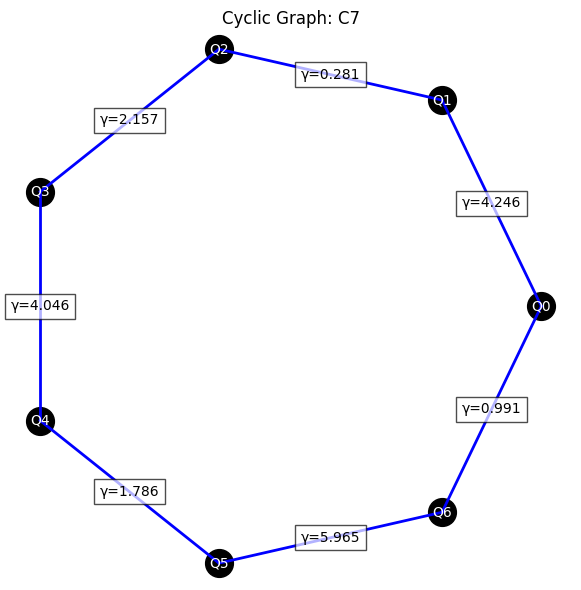

Gate times:
  γ(Q0-Q1): 4.25
  γ(Q1-Q2): 0.28
  γ(Q2-Q3): 2.16
  γ(Q3-Q4): 4.05
  γ(Q4-Q5): 1.79
  γ(Q5-Q6): 5.96
  γ(Q6-Q0): 0.99

Scheduling results:
Total time before: 20.47
Total time after: 8.75
Time improvement: 11.72 (57.3%)

Scheduling layers:

Layer 1 (time = 2.16):
  Gate Q2-Q3: time = 2.16

Layer 2 (time = 1.79):
  Gate Q4-Q5: time = 1.79

Layer 3 (time = 0.99):
  Gate Q6-Q0: time = 0.99

Layer 4 (time = 5.96):
  Gate Q5-Q6: time = 5.96

Layer 5 (time = 0.28):
  Gate Q1-Q2: time = 0.28

Layer 6 (time = 4.25):
  Gate Q0-Q1: time = 4.25

Layer 7 (time = 4.05):
  Gate Q3-Q4: time = 4.05

Mixer layer (time = 1.00)


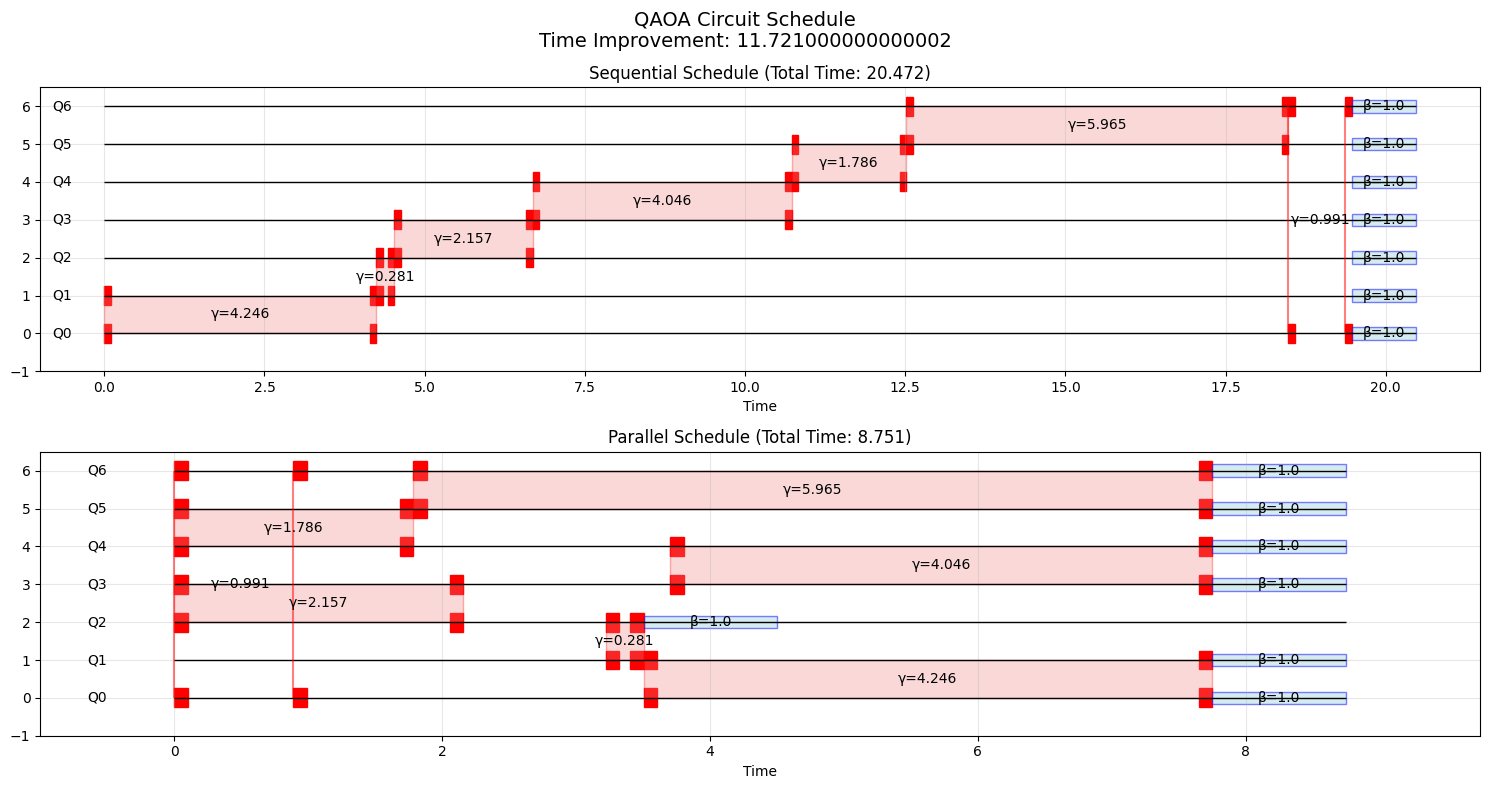

In [48]:
# C7 examples
print("\nC7 Examples")
print("=" * 50)
c7_results = []
for i in range(n_instances):
    circuit = create_random_circuit(n_qubits=7, seed=base_seed + n_instances + i)
    result = run_example(circuit, i + 1)
    c7_results.append(result)

In [49]:
# Analysis
analyze_results(c5_results, "C5")
analyze_results(c7_results, "C7")


Analysis for C5:
Average improvement: 41.1%
Best improvement: 46.6%
Worst improvement: 32.1%
Average number of layers: 5.0
Layer distribution: (array([5]), array([5]))

Analysis for C7:
Average improvement: 57.1%
Best improvement: 62.8%
Worst improvement: 52.8%
Average number of layers: 7.0
Layer distribution: (array([7]), array([5]))


In [50]:
# Compare C5 vs C7
print("\nC5 vs C7 Comparison:")
print("=" * 50)
c5_imp = [r.improvement / r.total_time_before for r in c5_results]
c7_imp = [r.improvement / r.total_time_before for r in c7_results]
print(f"C5 average improvement: {np.mean(c5_imp):.1%}")
print(f"C7 average improvement: {np.mean(c7_imp):.1%}")

c5_layers = [len(r.cost_layers) for r in c5_results]
c7_layers = [len(r.cost_layers) for r in c7_results]
print(
    f"\nC5 layers - Min: {min(c5_layers)}, Max: {max(c5_layers)}, Avg: {np.mean(c5_layers):.1f}"
)
print(
    f"C7 layers - Min: {min(c7_layers)}, Max: {max(c7_layers)}, Avg: {np.mean(c7_layers):.1f}"
)


C5 vs C7 Comparison:
C5 average improvement: 41.1%
C7 average improvement: 57.1%

C5 layers - Min: 5, Max: 5, Avg: 5.0
C7 layers - Min: 7, Max: 7, Avg: 7.0


import networkx as nx
import matplotlib.pyplot as plt

def visualize_complete_graph(circuit: QAOACircuit, figsize=(8, 8)):
    """
    Visualize a complete graph with edge weights from the QAOA circuit.
    
    Args:
        circuit (QAOACircuit): The QAOA circuit containing the graph structure
        figsize (tuple): Figure size for the plot (width, height)
    """
    # Create graph
    G = nx.Graph()
    
    # Add nodes
    for i in range(circuit.n_qubits):
        G.add_node(i)
    
    # Add edges with weights
    for (i, j), weight in circuit.gamma_gates.items():
        G.add_edge(i, j, weight=weight)
    
    # Create layout - circular layout works well for complete graphs
    pos = nx.circular_layout(G)
    
    # Setup plot
    plt.figure(figsize=figsize)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos,
                          node_color='lightblue',
                          node_size=500,
                          edgecolors='black')
    
    # Draw edges with varying thickness based on weights
    max_weight = max(circuit.gamma_gates.values())
    edge_weights = [circuit.gamma_gates[edge] for edge in G.edges()]
    normalized_weights = [2.0 * w / max_weight for w in edge_weights]
    
    nx.draw_networkx_edges(G, pos, width=normalized_weights, edge_color='gray',
                          alpha=0.7)
    
    # Add edge labels (weights)
    edge_labels = {(i, j): f'{w:.1f}' for (i, j), w in circuit.gamma_gates.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    # Add node labels
    node_labels = {i: f'Q{i}' for i in range(circuit.n_qubits)}
    nx.draw_networkx_labels(G, pos, node_labels)
    
    plt.title(f'Complete Graph K{circuit.n_qubits} with Gate Times')
    plt.axis('off')
    plt.tight_layout()
    
    return plt.gca()